In [20]:
#load data
#split data into train & test sets
#build network architecture
#compile network
#train network

import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH="data.json"

In [23]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    #convert lists into numpy arrays - labels and mfcc
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets

def plot_history(history):
    fig, axs = plt.subplots(2)
    
    #create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Evaluation")

    
    #create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Test Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error Evaluation")
    
    #plot accuracy 
    plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

Epoch 48/50
70/70 [==============================] - 0s 6ms/sample - loss: 7.8861 - accuracy: 0.5429 - val_loss: 3.4460 - val_accuracy: 0.4667
Epoch 49/50
70/70 [==============================] - 0s 6ms/sample - loss: 8.0741 - accuracy: 0.5143 - val_loss: 3.4552 - val_accuracy: 0.5000
Epoch 50/50
70/70 [==============================] - 0s 5ms/sample - loss: 10.8888 - accuracy: 0.4286 - val_loss: 3.4091 - val_accuracy: 0.5333


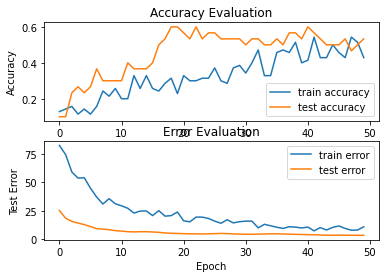

In [26]:
if __name__ == "__main__":
    inputs, targets = load_data(DATASET_PATH)
    
    #split into train & test
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,
                                                                             targets,
                                                                             test_size=0.3)
    
    #build network architecture
    #a sequential model - 1 input...3 hidden ..1 output layer
    model = keras.Sequential([
        #input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])), #2D array of mfcc [intervals, mffc value for interval]
        
        #1st hidden layer
        keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)), #regularizer-lambda
        keras.layers.Dropout(0.3),
        
        #2nd hidden layer
        keras.layers.Dense(256, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        #3rd hidden layer
        keras.layers.Dense(64, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        #multiclass classification problem
        #output layer
        keras.layers.Dense(10, activation="softmax") #enables us to normalize all 10 output neurons(genres) (sum=1)
    ])
    
    
    #compile network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer = optimizer,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
    model.summary()
    
    
    #train network
    history = model.fit(inputs_train, targets_train, 
              validation_data=(inputs_test, targets_test),
              epochs=50,
              batch_size=32) 
#batch --- stochastic(quick/innacurate)...full batch (gradient on all --- Slow/Accurate/MemoryIntensive)...mini-batch(X samples)
    
    #plot error and accuracy over the epochs
    plot_history(history)